<a href="https://colab.research.google.com/github/gitflai/CursoDDS/blob/main/M%C3%B3dulo_5_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Classificação**

## Importação dos dados

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
dados.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13.270422
std,14.049960,6.098187,1.205493,0.403694,12.110011
min,18.000000,15.960000,0.000000,0.000000,1.121874
25%,27.000000,26.296250,0.000000,0.000000,4.740287
50%,39.000000,30.400000,1.000000,0.000000,9.382033
75%,51.000000,34.693750,2.000000,0.000000,16.639913
max,64.000000,53.130000,5.000000,1.000000,63.770428


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

In [ ]:
import seaborn as sns

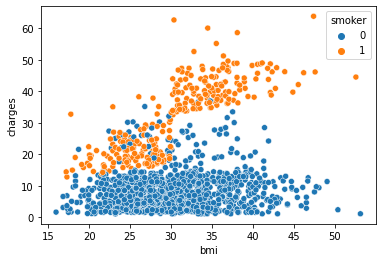

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

In [ ]:
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

In [ ]:
X.head()

,bmi,charges
0,27.900,16.884924
1,33.770,1.725552
2,33.000,4.449462
3,22.705,21.984471
4,28.880,3.866855


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

## **Validação Cruzada**

In [ ]:
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
kf = KFold(n_splits = 1338, shuffle = True)

## **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression 

modelo = LogisticRegression() 

### Desempenho do Modelo

In [ ]:
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
rl = accs.mean()

print('Acurácia Regressão Logística: {:.2f}%'.format(100*rl ))

Acurácia Regressão Logística: 93.27%


In [ ]:
X.values

array([[27.9      , 16.884924 ],
       [33.77     ,  1.7255523],
       [33.       ,  4.449462 ],
       ...,
       [36.85     ,  1.6298335],
       [25.8      ,  2.007945 ],
       [29.07     , 29.1413603]])

### Região de Decisão

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


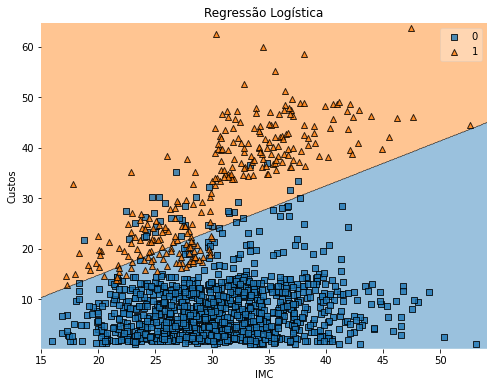

In [ ]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

modelo = LogisticRegression()
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Regressão Logística')  
plt.show()

## **KNN**

### Implementação do Modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

modelo = KNeighborsClassifier(n_neighbors = 255)

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
knn5 = accs.mean()
print('Acurácia 5-NN: {:.2f}%'.format(100*knn5 ))

Acurácia 5-NN: 90.13%


### Região de Decisão

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


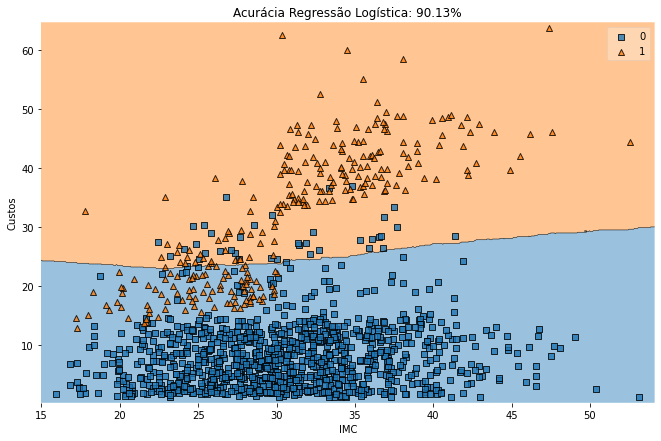

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (11, 7))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5 ))  
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

nome = '25-NN'
modelo = KNeighborsClassifier(n_neighbors = 25)
accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
knn5 = accs.mean()
print('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5 ))

Acurácia 25-NN: 96.09%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


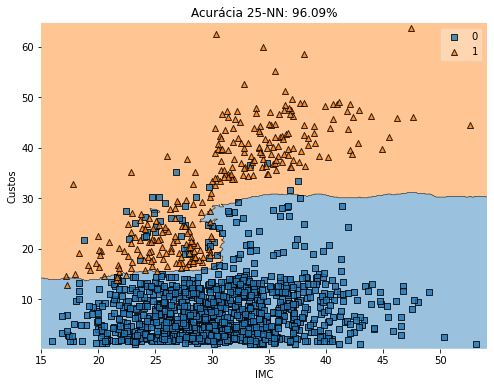

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5 ))  
plt.show()

## **Árvores de Decisão**

### Implementação do Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth = 3)

accs = cross_val_score(modelo, X, y, cv = kf, scoring = 'accuracy')
knn5 = accs.mean()

print('Acurácia Árvore de Decisão: {:.2f}%'.format(100*knn5 ))

### Região de Decisão

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


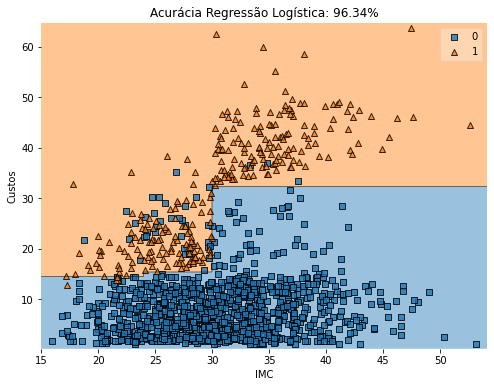

In [ ]:
modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Acurácia ' + nome + ': {:.2f}%'.format(100*knn5 ))  
plt.show()

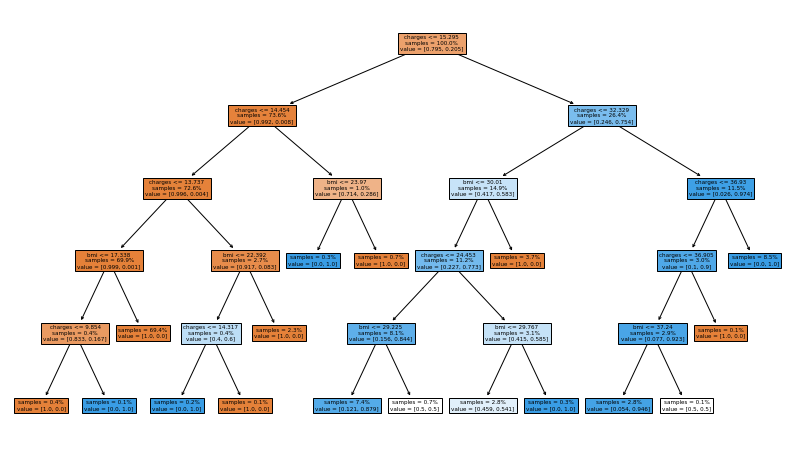

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

## **Medidas**

In [ ]:
modelo = LogisticRegression()
modelo.fit(X, y)
preditos = modelo.predict(X)
preditos

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(y, preditos)
mc.flatten()

array([1029,   35,   54,  220])

In [ ]:
vn, fp, fn, vp = mc.flatten()

print('VP: {}'.format(vp))
print('VN: {}'.format(vn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('\nTOTAL: {}'.format(fn+fp+vn+vp))



VP: 220
VN: 1029
FP: 35
FN: 54

TOTAL: 1338


In [ ]:
def MetricasClassBinaria(observado, predito, custo = None):
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()
 
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp) 
    efi = (sen + esp)/2
 
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp)) 
    print('                Eficiência: {:.4f}'.format(efi))
  
    metricas = { 'acurácia': acc, 'sensibilidade': sen, 
                'especificidade': esp, 'eficiência': efi}
  
    return metricas

In [ ]:
modelo1 = MetricasClassBinaria(y, preditos)

                  Acurácia: 0.9335
             Sensibilidade: 0.8029
            Especificidade: 0.9671
                Eficiência: 0.8850


---

In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 25)
modelo.fit(X, y)
preditos = modelo.predict(X)
preditos

modelo2 = MetricasClassBinaria(y, preditos)

                  Acurácia: 0.9649
             Sensibilidade: 0.9781
            Especificidade: 0.9615
                Eficiência: 0.9698


In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(X, y)
preditos = modelo.predict(X)
preditos

modelo3 = MetricasClassBinaria(y, preditos)

                  Acurácia: 0.9686
             Sensibilidade: 0.9854
            Especificidade: 0.9643
                Eficiência: 0.9748


---

Resumo da ópera 

In [ ]:
 resultados0 = {'Regressão Logística': list(modelo1.values()),
              '25-Vizinhos + Próximos': list(modelo2.values()),
              'Árvore de Decisão': list(modelo3.values())}
              
resultados = pd.DataFrame(resultados0, index = modelo1.keys()).T
resultados

,acurácia,sensibilidade,especificidade,eficiência
Regressão Logística,0.933483,0.802920,0.967105,0.885012
25-Vizinhos + Próximos,0.964873,0.978102,0.961466,0.969784
Árvore de Decisão,0.968610,0.985401,0.964286,0.974844


In [ ]:
from google.colab.data_table import DataTable

In [ ]:
DataTable(resultados.round(3))

,acurácia,sensibilidade,especificidade,eficiência
Regressão Logística,0.933,0.803,0.967,0.885
25-Vizinhos + Próximos,0.965,0.978,0.961,0.970
Árvore de Decisão,0.969,0.985,0.964,0.975


### Pergunta: Esses resultados podem estar apresentando **overfitting**?